# Workflow Example with CLIMATE_GRID input convertor
Here we illustrate a complete workflow example using the CLIMATE GRID convertor

## Imports

In [1]:
from pathlib import Path

import xarray as xr
import pandas as pd

import valenspy as vp #The Valenspy package
from valenspy.inputconverter_functions import CLIMATE_GRID_to_CF

from yaml import safe_load
from typing import Union, List

In [2]:
#Import Converter - This input converter will not do anything to the data.
ic = vp.InputConverter(CLIMATE_GRID_to_CF)


## 1. Convert the data

### Get the filenames of ERA5 data corresponding to CORDEX variable name


In [4]:
# open files for latlon grid using file manager
from valenspy.inputconverter_functions import *


In [12]:
# identify grid name to which CLIMATE_GRID is projected
gridname = 'latlon_be_5km'

In [13]:
manager = vp.InputManager(machine='hortense')
files = manager._get_file_paths("CLIMATE_GRID",["tas"], path_identifiers=[gridname]) #The magic happens here ! All

ds = xr.open_mfdataset(files, combine='by_coords')


In [14]:
CLIMATE_GRID_ds = ic.convert_input(ds) #Convert the input to the correct format
CLIMATE_GRID_ds

The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']


<xarray.Dataset> Size: 552MB
Dimensions:  (time: 25567, lon: 60, lat: 45)
Coordinates:
  * time     (time) datetime64[ns] 205kB 1954-01-01 1954-01-02 ... 2023-12-31
  * lon      (lon) float64 480B 2.4 2.47 2.54 2.61 2.68 ... 6.32 6.39 6.46 6.53
  * lat      (lat) float64 360B 49.5 49.55 49.59 49.63 ... 51.39 51.44 51.48
Data variables:
    tas      (time, lat, lon) float64 552MB dask.array<chunksize=(25567, 45, 60), meta=np.ndarray>
Attributes: (12/14)
    CDI:                 Climate Data Interface version 2.0.6 (https://mpimet...
    Conventions:         CF-1.6
    creation_date:       14-06-2024
    creators:            Ghilain N., Van Schaeybroeck B., Vanderkelen I.
    contact:             inne.vanderkelen@meteo.be
    version:             1.1
    ...                  ...
    history:             Tue Jun 18 12:44:25 2024: cdo remapcon,latlon_be_5km...
    CDO:                 Climate Data Operators version 2.0.6 (https://mpimet...
    dataset:             CLIMATE_GRID
    freq:                daily
    spatial_resolution:  0.07° x 0.045° (~5km)
    region:              belgium

In [16]:
# pass user defined metatadata
metadata_info = {'region' : region, 'freq' : time_freq, 'grid': gridname, "spatial_resolution": "0.07° x 0.045° (~5km)" }
# test of ERA5 convertor function
CLIMATE_GRID_ds = ic.convert_input(files, metadata_info) #Convert the input to the correct format
CLIMATE_GRID_ds

The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']


<xarray.Dataset> Size: 552MB
Dimensions:  (time: 25567, lon: 60, lat: 45)
Coordinates:
  * time     (time) datetime64[ns] 205kB 1954-01-01 1954-01-02 ... 2023-12-31
  * lon      (lon) float64 480B 2.4 2.47 2.54 2.61 2.68 ... 6.32 6.39 6.46 6.53
  * lat      (lat) float64 360B 49.5 49.55 49.59 49.63 ... 51.39 51.44 51.48
Data variables:
    tas      (time, lat, lon) float64 552MB dask.array<chunksize=(16192, 28, 37), meta=np.ndarray>
Attributes:
    CDI:            Climate Data Interface version 2.0.6 (https://mpimet.mpg....
    Conventions:    CF-1.6
    creation_date:  14-06-2024
    creators:       Ghilain N., Van Schaeybroeck B., Vanderkelen I.
    contact:        inne.vanderkelen@meteo.be
    version:        1.1
    affiliation:    Royal Meteorological Institute of Belgium
    projection:     +proj=lcc +lat_1=49.83333388888889 +lat_2=51.166667222222...
    history:        Tue Jun 18 12:44:25 2024: cdo remapcon,latlon_be_5km.txt ...
    CDO:            Climate Data Operators version 2.0.6 (https://mpimet.mpg....
    dataset:        CLIMATE_GRID

In [9]:
CLIMATE_GRID_ds[variable]

<xarray.DataArray 'tas' (time: 25567, lat: 45, lon: 60)> Size: 552MB
dask.array<add, shape=(25567, 45, 60), dtype=float64, chunksize=(16192, 28, 37), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 205kB 1954-01-01 1954-01-02 ... 2023-12-31
  * lon      (lon) float64 480B 2.4 2.47 2.54 2.61 2.68 ... 6.32 6.39 6.46 6.53
  * lat      (lat) float64 360B 49.5 49.55 49.59 49.63 ... 51.39 51.44 51.48
Attributes:
    units:               K
    standard_name:       air_temperature
    long_name:           Near-Surface Air Temperature
    original_name:       TEMP_AVG
    original_long_name:  Near-Surface Air Temperature
    dataset:             CLIMATE_GRID
    region:              belgium
    freq:                daily
    grid:                latlon_be_5km

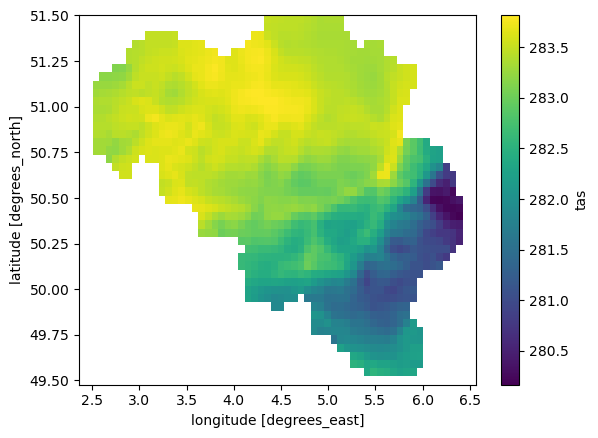

In [10]:
CLIMATE_GRID_ds[variable].mean('time').plot()

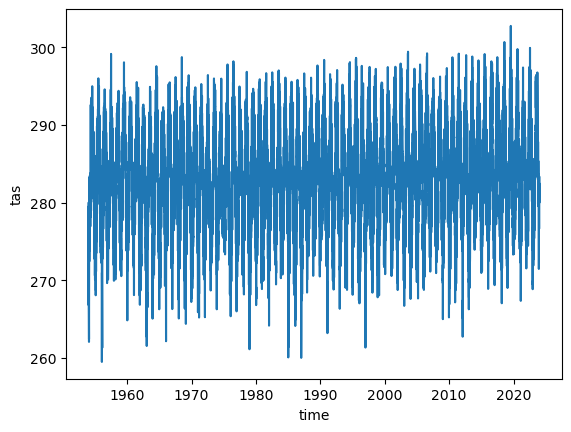

In [11]:
CLIMATE_GRID_ds[variable].mean(dim=('lat','lon')).plot()

### Check CLIMATE_GRID for all available variables

In [19]:
# files = Path(__file__).resolve().parent -- this is not working in notebook
src_path = Path("../src/valenspy") ## -- to be removed. 

with open(src_path / "ancilliary_data" / Path("CLIMATE_GRID_lookup.yml")) as file:
    obs_LOOKUP = safe_load(file)

# check for all available variables
variables = list(obs_LOOKUP.keys())

manager = vp.InputManager(machine='hortense')

ds = manager.load_data("CLIMATE_GRID",variables, path_identifiers=[gridname], cf_convert=True, metadata_info = metadata_info)


File paths found:
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/regridded/latlon_be_5km/WIND_SPEED_CLIMATE_GRID_1961_2023_daily_latlon_be_5km.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/regridded/latlon_be_5km/PRECIP_1H_MAX_CLIMATE_GRID_2020_2023_daily_latlon_be_5km.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/regridded/latlon_be_5km/WIND_PEAK_SPEED_CLIMATE_GRID_2019_2023_daily_latlon_be_5km.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/regridded/latlon_be_5km/PRESSURE_CLIMATE_GRID_1961_2023_daily_latlon_be_5km.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/regridded/latlon_be_5km/HUMIDITY_RELATIVE_CLIMATE_GRID_1961_2023_daily_latlon_be_5km.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/regridded/latlon_be_5km/EVAPOTRANS_REF_CLI

KeyError: 'prhmax'

In [27]:
files

[PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/TEMP_AVG_CLIMATE_GRID_1950_2023_daily.nc'),
 PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/TEMP_MAX_CLIMATE_GRID_1950_2023_daily.nc'),
 PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/TEMP_MIN_CLIMATE_GRID_1950_2023_daily.nc'),
 PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/PRECIP_QUANTITY_CLIMATE_GRID_1950_2023_daily.nc'),
 PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/HUMIDITY_RELATIVE_CLIMATE_GRID_1950_2023_daily.nc'),
 PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/WIND_SPEED_CLIMATE_GRID_1950_2023_daily.nc'),
 PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/SHORT_WAVE_FROM_SKY_CLIMA

In [28]:
# Example without metadata passed 

# test of ERA5 convertor function
CLIMATE_GRID_ds = ic.convert_input(files) #Convert the input to the correct format
CLIMATE_GRID_ds

<xarray.Dataset> Size: 5GB
Dimensions:  (lon: 57, lat: 46, time: 27028)
Coordinates:
  * lon      (lon) float64 456B 2.514 2.584 2.654 2.724 ... 6.289 6.359 6.428
  * lat      (lat) float64 368B 49.51 49.55 49.6 49.64 ... 51.44 51.49 51.53
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
Data variables:
    evspsbl  (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    huss     (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    pr       (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    psl      (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    rsds     (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    tas      (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    tasmax   (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    tasmin   (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    sfcWind  (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
Attributes:
    creation_date:          10-06-2024
    creators:               Ghilain N., Van Schaeybroeck B., Vanderkelen I.
    contact:                inne.vanderkelen@meteo.be
    version:                1.1
    horizontal resolution:  5 by 5 km
    affiliation:            Royal Meteorological Institute of Belgium
    dataset:                CLIMATE_GRID
    freq:                   daily
    spatial_resolution:     5km
    region:                 belgium

In [29]:
CLIMATE_GRID_ds['rsds']

<xarray.DataArray 'rsds' (time: 27028, lat: 46, lon: 57)> Size: 567MB
dask.array<truediv, shape=(27028, 46, 57), dtype=float64, chunksize=(17117, 28, 35), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 456B 2.514 2.584 2.654 2.724 ... 6.289 6.359 6.428
  * lat      (lat) float64 368B 49.51 49.55 49.6 49.64 ... 51.44 51.49 51.53
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
Attributes:
    units:               W m-2
    standard_name:       surface_downwelling_shortwave_flux_in_air
    long_name:           Surface Downwelling Shortwave Radiation
    original_name:       SHORT_WAVE_FROM_SKY
    original_long_name:  average daily global solar radiation
    dataset:             CLIMATE_GRID
    freq:                daily
    spatial_resolution:  5km
    region:              belgium